In [1]:
import numpy as np
import pandas as pd
import random
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/soma/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

In [4]:
df.head()

,Stationary,Nonstationary
0,2.030431,0.546828
1,1.106678,0.241063
2,-0.258197,0.790528
3,-3.262731,0.635300
4,0.841623,0.544296


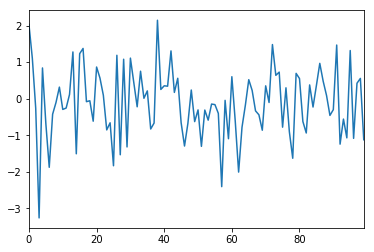

In [5]:
df.Stationary.plot()

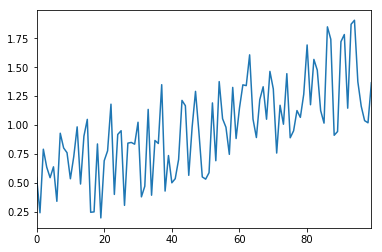

In [6]:
df.Nonstationary.plot()

In [7]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Stationary)

(-10.700521889604385,
 3.533083543354423e-19,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 230.80800182948576)

In [8]:
adfuller(df.Nonstationary)

(-1.0198056018914106,
 0.7459722995087745,
 7,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 57.541106432592585)

## Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [9]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [10]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

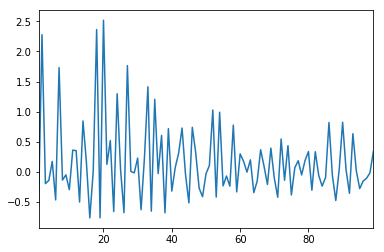

In [11]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [12]:
df['Diff'] = df.Nonstationary.diff()

In [13]:
# Drop the NaNs created from the diff function
df = df.dropna()

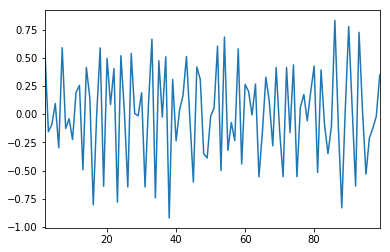

In [14]:
# Plot the diff function
df.Diff.plot()

In [15]:
df

,Stationary,Nonstationary,Returns,Diff
2,-0.258197,0.790528,2.279341,0.549465
3,-3.262731,0.635300,-0.196359,-0.155228
4,0.841623,0.544296,-0.143246,-0.091004
5,-0.685069,0.638122,0.172380,0.093826
6,-1.877259,0.339897,-0.467349,-0.298226
7,-0.424223,0.928703,1.732310,0.588806
8,-0.102518,0.801412,-0.137063,-0.127291
9,0.317010,0.760421,-0.051148,-0.040990
10,-0.293437,0.534945,-0.296514,-0.225476
11,-0.256045,0.727819,0.360547,0.192873
